<a href="https://colab.research.google.com/github/RennanRnz/previs-o-renda/blob/main/Projeto_2_Jupyternotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 2 - Previsão de renda

-----------------------------

# Etapa 1 CRISP - DM: Entendimento do negócio


- Iremos realizar uma analise do banco de dados para gerar um modelo preditivo de credito.

----------------

# Etapa 2 Crisp-DM: Dicionário dos dados

| Variável | Descrição | Tipo |
|---|---|---|
| data_ref | Data de referência | Objeto |
| id_cliente | Id do cliente | Int |
| sexo | Sexo do cliente | Objeto |
| posse_de_veiculo | Possui veículo? | Booleano |
| posse_de_imovel | Possui imóvel? | Booleano |
| qtd_filhos | Quantos filhos? | Int |
| tipo_renda | Tipo de renda | Objeto |
| educacao | Escolaridade | Objeto |
| estado_civil | Estado civil | Objeto |
| tipo_residencia | Tipo de residência | Objeto |
| idade | Idade | Int |
| tempo_emprego | Tempo de empregabilidade | Float |
| qt_pessoas_residencia | Quantidade de pessoas na residência | Float |
| renda | Renda | Float |   

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import streamlit as st
import os
from ydata_profiling import ProfileReport
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.preprocessing import LabelEncoder, StandardScaler
import statsmodels.formula.api as smf
%matplotlib inline

In [ ]:
df = pd.read_csv('previsao_de_renda.csv')

In [ ]:
df.columns

Index(['Unnamed: 0', 'data_ref', 'id_cliente', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'renda'],
      dtype='object')

In [ ]:
os.makedirs('./output/', exist_ok=True)

In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df.shape

(15000, 14)

In [ ]:
distribution = ProfileReport(df, explorative=True, minimal=True)

In [ ]:
distribution.to_file('./output/analise_de_renda.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
distribution

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               15000 non-null  object 
 1   id_cliente             15000 non-null  int64  
 2   sexo                   15000 non-null  object 
 3   posse_de_veiculo       15000 non-null  bool   
 4   posse_de_imovel        15000 non-null  bool   
 5   qtd_filhos             15000 non-null  int64  
 6   tipo_renda             15000 non-null  object 
 7   educacao               15000 non-null  object 
 8   estado_civil           15000 non-null  object 
 9   tipo_residencia        15000 non-null  object 
 10  idade                  15000 non-null  int64  
 11  tempo_emprego          12427 non-null  float64
 12  qt_pessoas_residencia  15000 non-null  float64
 13  renda                  15000 non-null  float64
dtypes: bool(2), float64(3), int64(3), object(6)
memory usa

# Analise das variaveis!

- Variaveis demográficas: ```idade```, ```sexo```, ```estado civil```, ```quantidade de filhos```, ```tipo de residência```, ```quantidade de pessoas na residência```. Essas variáveis podem indicar estabilidade e capacidade de pagamento.


- Variaveis socioeconômicas: ```renda```, ```tipo de renda```, ```escolaridade```, ```posse de veículo```, ```posse de imóvel```. Essas variáveis podem fornecer informações sobre a capacidade financeira do cliente e seu padrão de consumo.

- variável comportamental: ```tempo de emprego```. Essa variável pode indicar estabilidade profissional.

----------------------------------------------

C:\Users\renna\AppData\Local\Temp\ipykernel_22996\326074874.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'sexo', ax = ax1, palette=colors)
C:\Users\renna\AppData\Local\Temp\ipykernel_22996\326074874.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'posse_de_veiculo', ax = ax2, palette=colors)
C:\Users\renna\AppData\Local\Temp\ipykernel_22996\326074874.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'posse_de_imovel', ax = ax3, palette=colors)


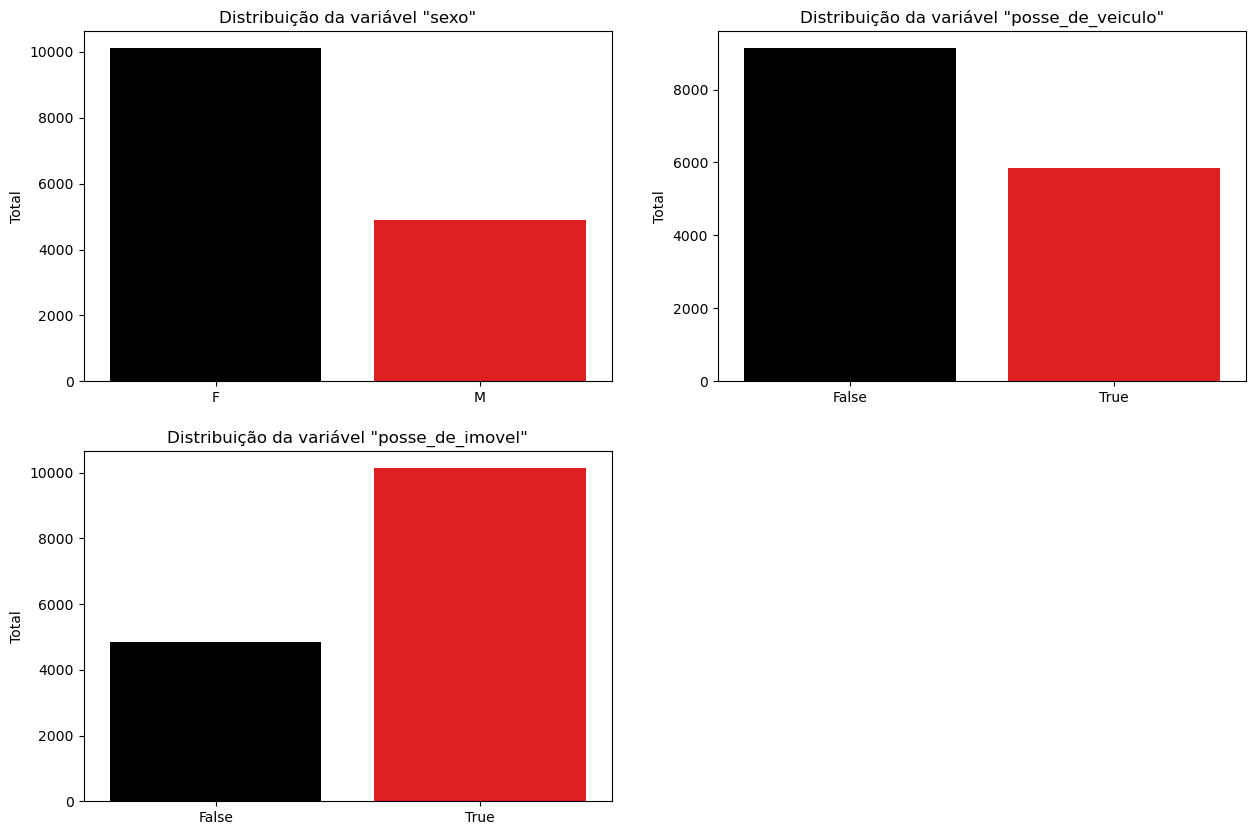

In [ ]:
figura, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,10))

colors = ['black', 'red']

sns.countplot(data = df, x = 'sexo', ax = ax1, palette=colors)
sns.countplot(data = df, x = 'posse_de_veiculo', ax = ax2, palette=colors)
sns.countplot(data = df, x = 'posse_de_imovel', ax = ax3, palette=colors)

ax1.set_title('Distribuição da variável "sexo"')
ax2.set_title('Distribuição da variável "posse_de_veiculo"')
ax3.set_title('Distribuição da variável "posse_de_imovel"')

ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')

ax1.set_ylabel('Total')
ax2.set_ylabel('Total')
ax3.set_ylabel('Total')

ax4.remove()

plt.show()


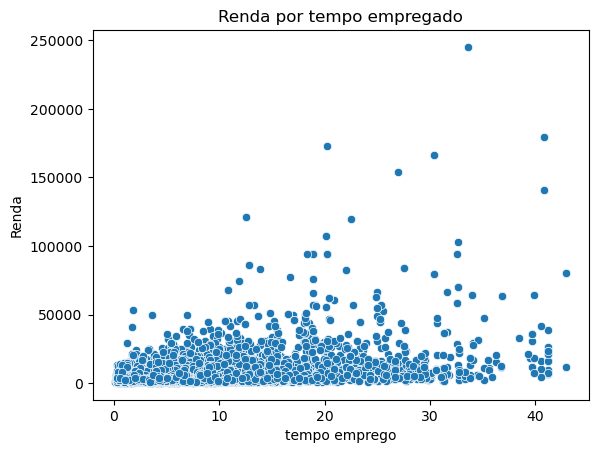

In [ ]:
sns.scatterplot(x='tempo_emprego', y='renda', data=df)
plt.title('Renda por tempo empregado')
plt.xlabel('tempo emprego')
plt.ylabel('Renda')
plt.show()


In [ ]:
df[ ['idade', 'tempo_emprego', 'qtd_filhos', 'qt_pessoas_residencia'] ].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
idade,15000.0,43.882333,11.273155,22.000000,34.000000,43.000000,53.000000,68.000000
tempo_emprego,12427.0,7.722635,6.711189,0.117808,2.973973,6.013699,10.120548,42.906849
qtd_filhos,15000.0,0.432333,0.746631,0.000000,0.000000,0.000000,1.000000,14.000000
qt_pessoas_residencia,15000.0,2.206400,0.909792,1.000000,2.000000,2.000000,3.000000,15.000000


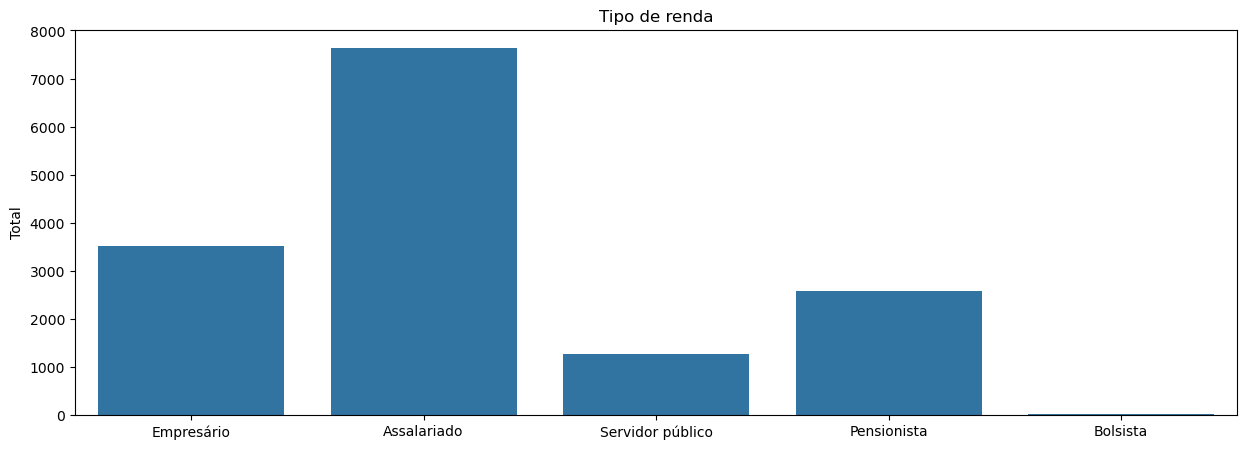

In [ ]:
figura = plt.figure(figsize=(15,5))

ax = sns.countplot(data = df, x = 'tipo_renda')
ax.set_title("Tipo de renda")
ax.set_xlabel("")
ax.set_ylabel("Total")

plt.show()

In [ ]:
df['tipo_renda'].value_counts()

tipo_renda
Assalariado         7633
Empresário          3508
Pensionista         2582
Servidor público    1268
Bolsista               9
Name: count, dtype: int64

- Na variavel ```tipo de renda``` identificamos uma frequencia muito baixa para categoria ```Bolsista```.

------------------------

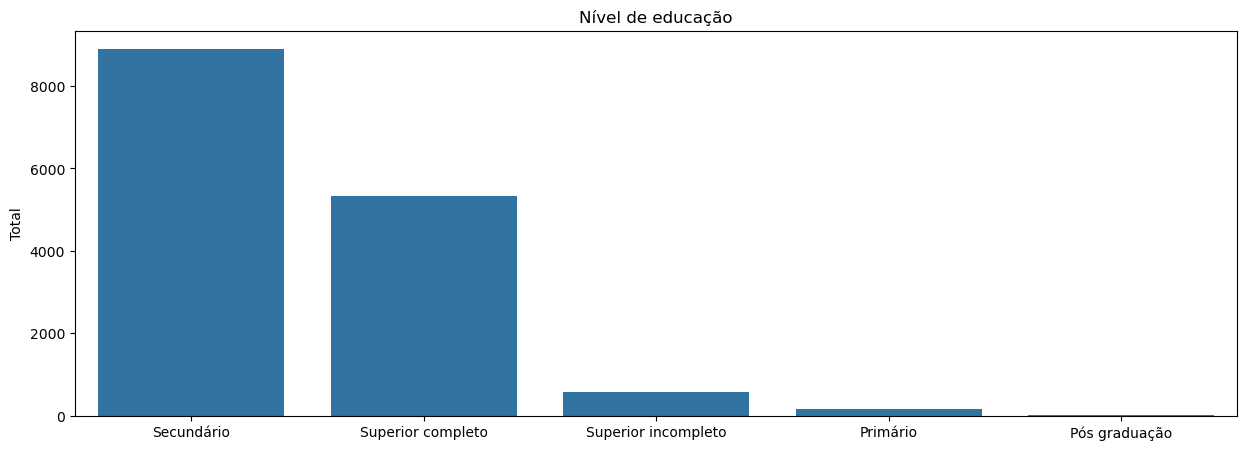

In [ ]:
figura = plt.figure(figsize=(15,5))

ax = sns.countplot(data = df, x = 'educacao')
ax.set_title("Nível de educação")
ax.set_xlabel("")
ax.set_ylabel("Total")

plt.show()

In [ ]:
df['educacao'].value_counts()


educacao
Secundário             8895
Superior completo      5335
Superior incompleto     579
Primário                165
Pós graduação            26
Name: count, dtype: int64

- Na variavel ```educacao``` identificamos uma frequencia muito baixa para categoria ```Pós graduação```. Possivelmente devido ao custo elevado de uma pós e também do fato de não ser obrigatório a maioria das pessoas optem por não fazer.

---------------------------

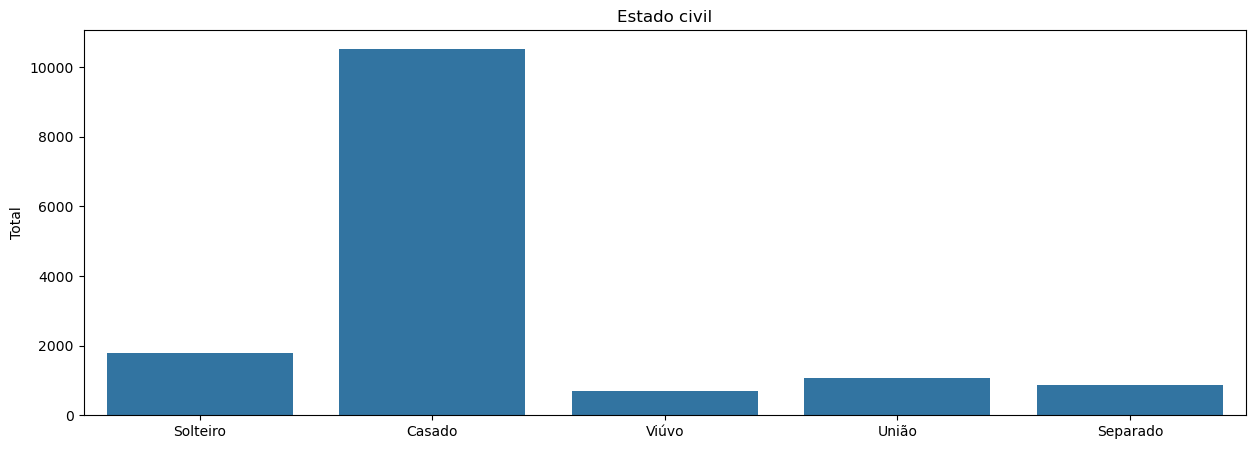

In [ ]:
figura = plt.figure(figsize=(15,5))

ax = sns.countplot(data = df, x = 'estado_civil')
ax.set_title("Estado civil")
ax.set_xlabel("")
ax.set_ylabel("Total")

plt.show()

In [ ]:
df['estado_civil'].value_counts()

estado_civil
Casado      10534
Solteiro     1798
União        1078
Separado      879
Viúvo         711
Name: count, dtype: int64

- Na variavel ```estado_civil``` temos os dados bem distribuidos porem a categoria ```Casado```é predominante.

In [ ]:
casados = df[df['estado_civil'] == 'Casado']

In [ ]:
sns.boxplot(x='estado_civil', y='renda', data=casados, color='skyblue')

<Axes: xlabel='estado_civil', ylabel='renda'>

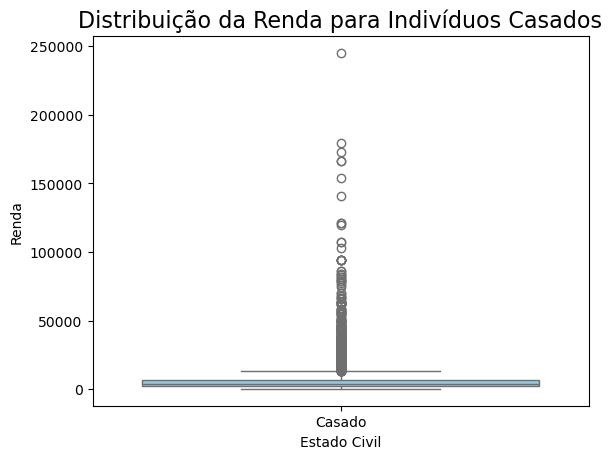

In [ ]:
plt.title('Distribuição da Renda para Indivíduos Casados', fontsize=16)
plt.xlabel('Estado Civil')
plt.ylabel('Renda')

plt.show()

---------------

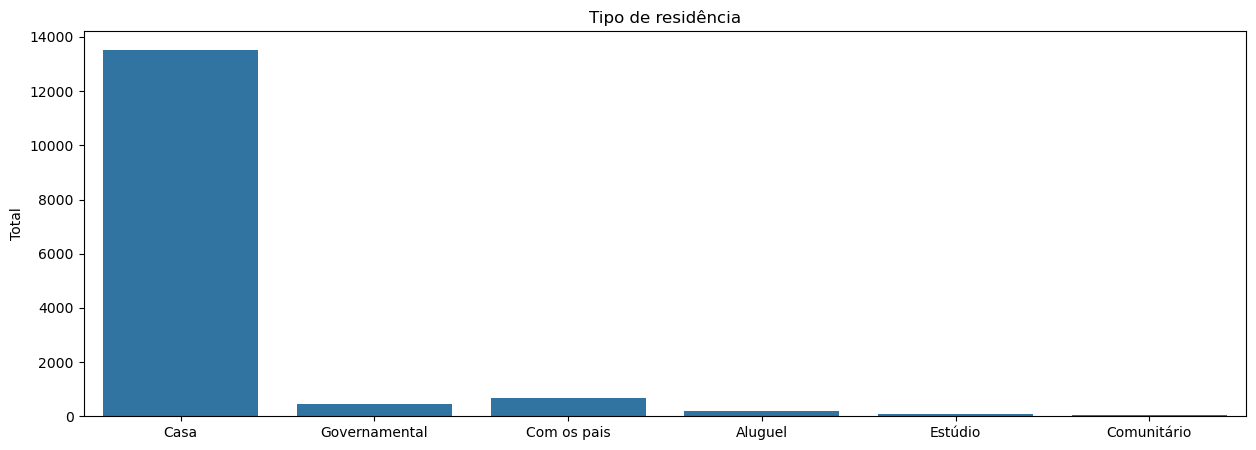

In [ ]:
figura = plt.figure(figsize=(15,5))

ax = sns.countplot(data = df, x = 'tipo_residencia')
ax.set_title("Tipo de residência")
ax.set_xlabel("")
ax.set_ylabel("Total")

plt.show()

In [ ]:
df['tipo_residencia'].value_counts()

tipo_residencia
Casa             13532
Com os pais        675
Governamental      452
Aluguel            194
Estúdio             83
Comunitário         64
Name: count, dtype: int64

- Na variável ```tipo_residencia``` temos a predominância da categoria ```Casa```. Se formos fazer uma analise lógica percebemos que neste banco de dados a maioria das pessoas são casadas e consequentemente optam por morar em casas.

-----------

# Analisando a relação da variável resposta ```renda``` com as ```Variáveis demográficas```, ```socioeconômicas``` e ```comportamental```.

C:\Users\renna\AppData\Local\Temp\ipykernel_22996\3420044901.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(x='estado_civil', y='renda', data=df, color='red', markers='*', linestyles='dashed', ci=95)


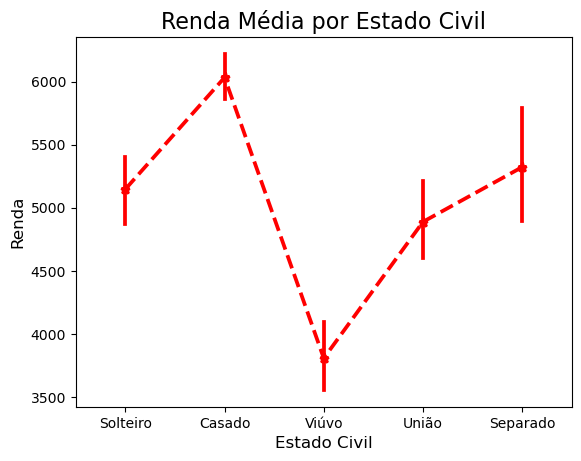

In [ ]:
sns.pointplot(x='estado_civil', y='renda', data=df, color='red', markers='*', linestyles='dashed', ci=95)
plt.title('Renda Média por Estado Civil', fontsize=16)
plt.xlabel('Estado Civil', fontsize=12)
plt.ylabel('Renda', fontsize=12)

plt.show()

In [ ]:
figura, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6,1, figsize=(15,15))

In [ ]:
sns.pointplot(data = df, x = 'data_ref', y = 'renda', hue = 'sexo', ax = ax1)


<Axes: xlabel='data_ref', ylabel='renda'>

In [ ]:
sns.pointplot(data = df, x = 'data_ref', y = 'renda', hue = 'posse_de_veiculo', ax = ax2)


<Axes: xlabel='data_ref', ylabel='renda'>

In [ ]:
sns.pointplot(data = df, x = 'data_ref', y = 'renda', hue = 'posse_de_imovel', ax = ax3)


<Axes: xlabel='data_ref', ylabel='renda'>

In [ ]:
sns.pointplot(data = df, x = 'data_ref', y = 'renda', hue = 'idade', ax = ax4)


<Axes: xlabel='data_ref', ylabel='renda'>

In [ ]:
sns.pointplot(data = df, x = 'data_ref', y = 'renda', hue = 'estado_civil', ax = ax5)


<Axes: xlabel='data_ref', ylabel='renda'>

In [ ]:
sns.pointplot(data = df, x = 'data_ref', y = 'renda', hue = 'tempo_emprego', ax = ax6)

<Axes: xlabel='data_ref', ylabel='renda'>

C:\Users\renna\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


In [ ]:
valores_x = pd.to_datetime(df['data_ref']).dt.strftime("%m/%y").unique()

In [ ]:
ax1.set_xlabel("")
ax2.set_xlabel("")
ax3.set_xlabel("")
ax4.set_xlabel("")
ax5.set_xlabel("")
ax6.set_xlabel("")

ax1.set_title("Média da renda ao longo dos meses baseado no sexo")
ax2.set_title("Média da renda ao longo dos meses baseado se possuí veículo ou não")
ax3.set_title("Média da renda ao longo dos meses baseado se possuí imóvel ou não")
ax4.set_title("Média da renda ao longo dos meses baseado na idade")
ax5.set_title("Média da renda ao longo dos meses baseado no estado civil")
ax6.set_title("Média da renda ao longo dos meses baseado no tempo de emprego")

ax1.set_xticklabels(valores_x)
ax2.set_xticklabels(valores_x)
ax3.set_xticklabels(valores_x)
ax4.set_xticklabels(valores_x)
ax5.set_xticklabels(valores_x)
ax6.set_xticklabels(valores_x)

figura.subplots_adjust(hspace=0.3)

C:\Users\renna\AppData\Local\Temp\ipykernel_22996\4090896996.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(valores_x)
C:\Users\renna\AppData\Local\Temp\ipykernel_22996\4090896996.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(valores_x)
C:\Users\renna\AppData\Local\Temp\ipykernel_22996\4090896996.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(valores_x)
C:\Users\renna\AppData\Local\Temp\ipykernel_22996\4090896996.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels(valores_x)
C:\Users\renna\AppData\Local\Temp\ipykernel_22996\4090896996.py:19: UserWarning: set

C:\Users\renna\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


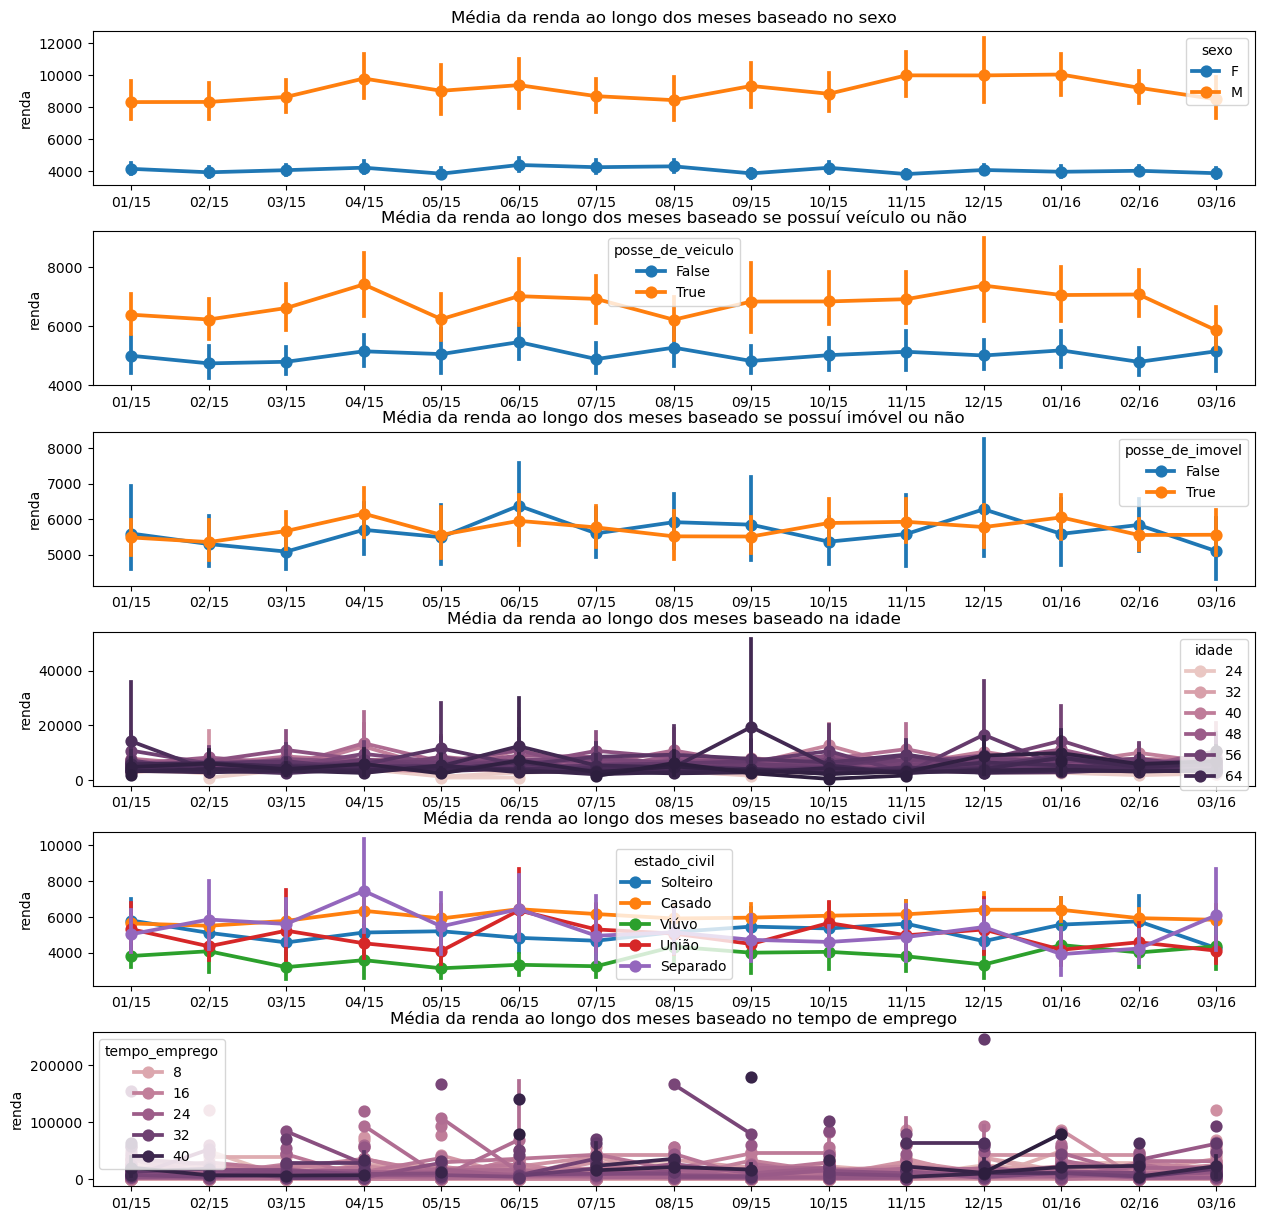

In [ ]:
plt.show()

----------

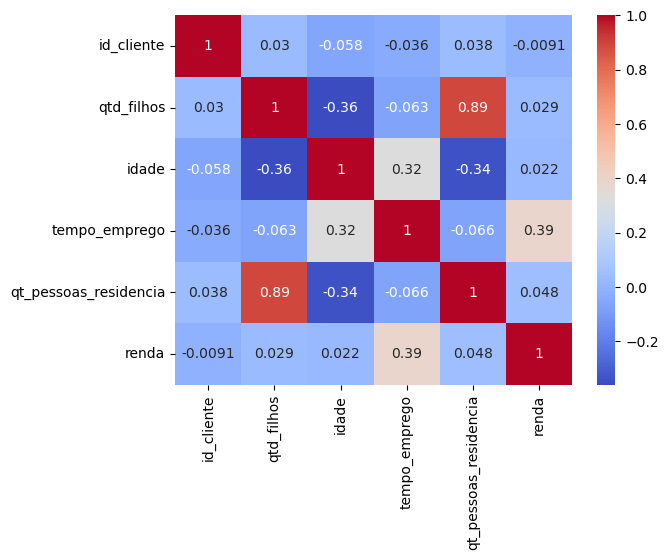

In [ ]:
ax = sns.heatmap(df.select_dtypes('number').corr(),
                annot=True,
                cmap='coolwarm')

plt.show()

C:\Users\renna\AppData\Local\Temp\ipykernel_22996\1481668848.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=15)


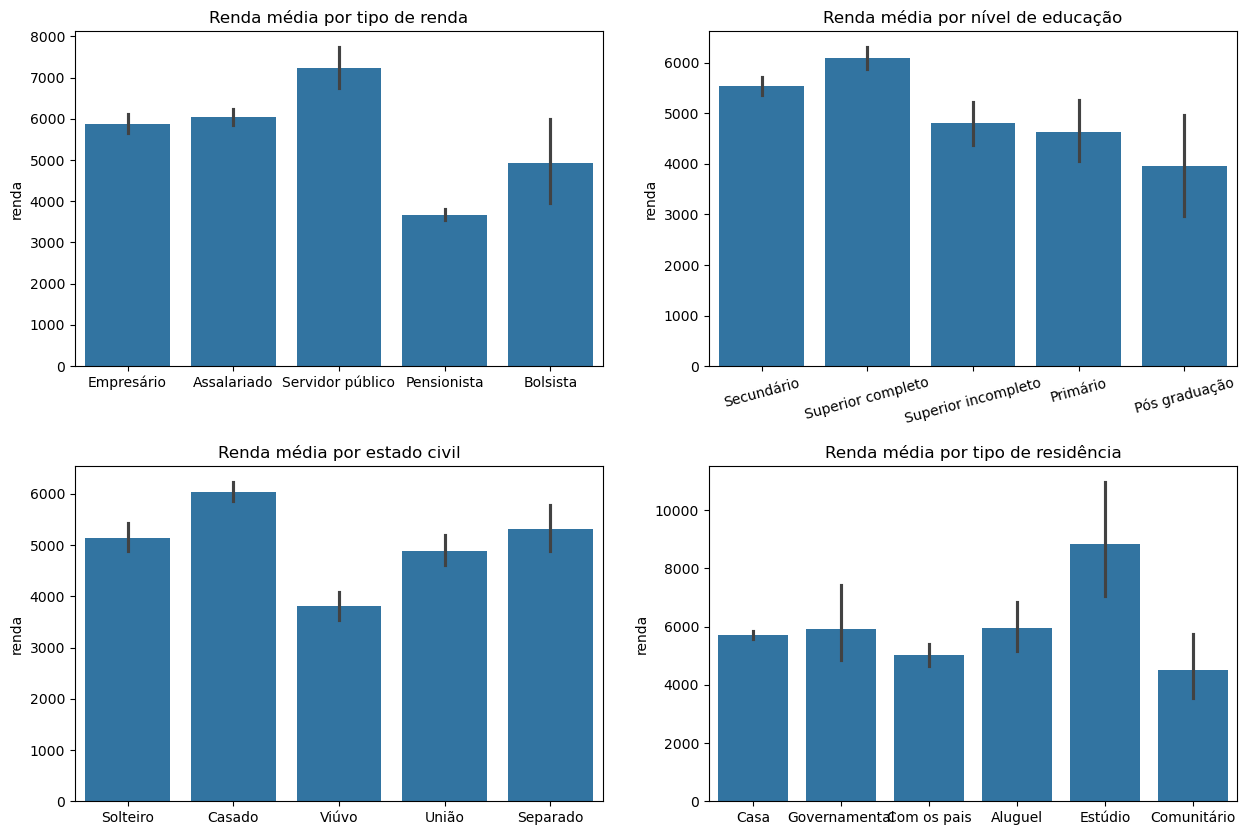

In [ ]:
figura, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,10))

sns.barplot(data = df, x = 'tipo_renda', y = 'renda', errorbar=('ci', 95), ax = ax1)
sns.barplot(data = df, x = 'educacao', y = 'renda', errorbar=('ci', 95), ax = ax2)
sns.barplot(data = df, x = 'estado_civil', y = 'renda', errorbar=('ci', 95), ax = ax3)
sns.barplot(data = df, x = 'tipo_residencia', y = 'renda', errorbar=('ci', 95), ax = ax4)

ax2.set_xticklabels(ax2.get_xticklabels(), rotation=15)

ax1.set_xlabel("")
ax2.set_xlabel("")
ax3.set_xlabel("")
ax4.set_xlabel("")

ax1.set_title("Renda média por tipo de renda")
ax2.set_title("Renda média por nível de educação")
ax3.set_title("Renda média por estado civil")
ax4.set_title("Renda média por tipo de residência")

figura.subplots_adjust(hspace=0.3)

plt.show()

----------------

# Etapa 3 Crisp-DM: Preparação dos dados

- Vamos remover algumas variáveis que não serão uteis para nosso modelo.

In [ ]:
df.drop(columns=['id_cliente', 'data_ref'], inplace=True)

In [ ]:
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


-------------

# Etapa 4 Crisp-DM: Modelagem

In [ ]:
reg = smf.ols('renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia ''',
              data = df).fit()

In [ ]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     211.8
Date:                Wed, 27 Nov 2024   Prob (F-statistic):               0.00
Time:                        10:50:11   Log-Likelihood:            -1.2880e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12406   BIC:                         2.578e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                        -5211.5527   2501.465     -2.083      0.037   -1.01e+04    -308.292
sexo[T.M]                         6012.5858    155.726     38.610      0.000    5707.340    6317.832
posse_de_veiculo[T.True]            62.7495    150.465      0.417      0.677    -232.186     357.685
posse_de_imovel[T.True]            372.0577    148.822      2.500      0.012      80.343     663.773
educacao[T.Pós graduação]         1357.6468   1691.327      0.803      0.422   -1957.617    4672.911
educacao[T.Secundário]             679.9616    766.295      0.887      0.375    -822.095    2182.018
educacao[T.Superior completo]     1351.6946    768.622      1.759      0.079    -154.925    2858.314
educacao[T.Superior incompleto]    348.3263    827.553      0.421      0.674   -1273.807    1970.459
estado_civil[T.Separado]          1101.0993   1184.078      0.930      0.352   -1219.877    3422.076
estado_civil[T.Solteiro]           768.2827   1159.266      0.663      0.508   -1504.058    3040.623
estado_civil[T.União]             -427.0078    267.815     -1.594      0.111    -951.967      97.951
estado_civil[T.Viúvo]              916.8890   1230.207      0.745      0.456   -1494.507    3328.285
tipo_residencia[T.Casa]           -298.8712    576.380     -0.519      0.604   -1428.665     830.922
tipo_residencia[T.Com os pais]    -455.1854    642.362     -0.709      0.479   -1714.314     803.943
tipo_residencia[T.Comunitário]    -584.2604   1121.376     -0.521      0.602   -2782.331    1613.810
tipo_residencia[T.Estúdio]         186.3163   1056.458      0.176      0.860   -1884.506    2257.139
tipo_residencia[T.Governamental]    86.9789    702.385      0.124      0.901   -1289.805    1463.762
qtd_filhos                       -1069.9553   1149.000     -0.931      0.352   -3322.174    1182.263
idade                               40.7862      8.520      4.787      0.000      24.085      57.487
tempo_emprego                      549.6470     10.929     50.292      0.000     528.224     571.070
qt_pessoas_residencia             1188.2018   1146.888      1.036      0.300   -1059.877    3436.281
==============================================================================
Omnibus:                    17535.414   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9771327.389
Skew:                           8.097   Prob(JB):                         0.00
Kurtosis:                     139.414   Cond. No.                     2.18e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+03. This might indicate that there are
stron

-------------------


# Etapa 5 Crisp-DM: Avaliando os resultados

In [ ]:
print(f'O modelo criado possui r-quadrado de {reg.rsquared*100:2f}')

O modelo criado possui r-quadrado de 25.449472


In [ ]:
print(f'O modelo criado possui AIC de {reg.aic*100:2f}')


O modelo criado possui AIC de 25764727.340895


Com base no modelo desenvolvido as variaveis mais importantes para predefinição de renda são: ```idade```, ```tempo_emprego```, ```sexo```,```posse_de_imovel```, ```posse_de_veiculo``` e ```educacao```.

--------------------

# Etapa 6 Crisp-DM: Implementando o modelo

Implementação será realizada no ```Streamlit```, vamos desenvolver um script para o mesmo.

----------